In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [9]:
y_true = (0.5 * x_data) + 5 +noise

In [10]:
y_true

array([ 5.31247152,  4.67305376,  6.33272792, ..., 10.92403532,
       10.0332653 , 11.24959236])

In [11]:
x_df = pd.DataFrame(data = x_data, columns=['X Data'])

In [13]:
y_df = pd.DataFrame(data = y_true, columns=['Y'])

In [17]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [24]:
my_data = pd.concat([x_df,y_df], axis=1)

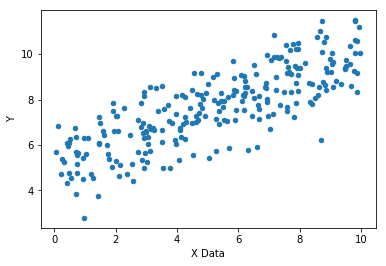

In [27]:
my_data.sample(n=250).plot(kind = 'scatter', x = 'X Data', y = 'Y')

In [28]:
batch_size = 8

In [29]:
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [31]:
x_ph = tf.placeholder(tf.float32, [batch_size])

In [32]:
y_ph = tf.placeholder(tf.float32, [batch_size])

In [33]:
y_model = m * x_ph + b

In [34]:
error = tf.reduce_sum(tf.square(y_ph-y_model))

In [35]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [36]:
init = tf.global_variables_initializer()

In [38]:
rand_ind = np.random.randint(len(x_data), size = batch_size)
rand_ind

array([909771, 676355, 411708, 625943, 681426, 654681, 299462, 303159])

In [39]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size = batch_size)
        feed = {x_ph: x_data[rand_ind], y_ph: y_true[rand_ind]}
        sess.run(train, feed_dict = feed)
    model_m, model_b = sess.run([m,b])

In [40]:
model_m

0.5332331

In [41]:
model_b

4.9198813